In [2]:
import pandas as pd
import datetime
from collections import Counter
import matplotlib.pyplot as plt
import time
import numpy as np
import json
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

0.0206148624420166 กรุงเทพมหานคร 4.245545363086864
0.007478952407836914 เชียงใหม่ 1.015736646547521
0.007686138153076172 ชลบุรี 2.272374807340679
0.007030963897705078 นครปฐม 0.8651840009383868
0.006852149963378906 นนทบุรี 2.760770553242817
0.0075342655181884766 ปทุมธานี 1.643599351247692
0.0069544315338134766 ภูเก็ต 23.53747306807955
0.006533145904541016 ราชบุรี 0.6944564270866765
0.006303071975708008 สมุทรปราการ 2.048977453589734
0.00701594352722168 สมุทรสาคร 19.348292985829044
0.006508588790893555 สมุทรสงคราม 2.154104096807115
0.007086038589477539 สุราษฎร์ธานี 3.1068363981021347
0.006745815277099609 ตาก 5.935488202427399
0.006190776824951172 จันทบุรี 1.6925306082056317
0.006524085998535156 กระบี่ 1.7966804110764594
0.0060350894927978516 แม่ฮ่องสอน 1.204889140358954
0.0064618587493896484 อำนาจเจริญ 0.9110966387113067
0.006154060363769531 อ่างทอง 0.9109348335406242
0.006075143814086914 บึงกาฬ 0.8142554532487288
0.0060329437255859375 บุรีรัมย์ 1.141549623573221
0.006054878234863281 ฉะเช

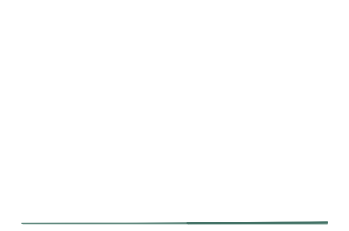

In [29]:
def movingAve(ys):
    N = 7
    cumsum, moving_aves = [0], []
    for i, x in enumerate(ys, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return(moving_aves)
images=[]
with open('../../components/gis/data/provincial-vaccination-data.json', encoding='utf-8') as json_file:
    jsondata = json.load(json_file)
    start = datetime.datetime.strptime("2021-03-01", "%Y-%m-%d")
    end = datetime.datetime.strptime(jsondata[0]['dates'][-1], "%Y-%m-%d")
    #end = datetime.datetime.today()
    date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
    fulldate=[]
    for date in date_generated:
        fulldate.append(date)    

    provinces={}
    for province in jsondata:
        #plt.figure(figsize=(15,10))
        plt.cla()
        start=time.time()
        date_strings=province['dates']
        timeseries={}
        index=0
        dates=[datetime.datetime.strptime(x, "%Y-%m-%d") for x in date_strings]
        for date in dates:
            timeseries[date] = province['doses-cum'][index]
            index+=1
        index=0
        xs=list(timeseries.keys())
        ys=list(timeseries.values())
        xs,ys=zip(*sorted(zip(xs, ys)))
        coverages = []
        for i in range(len(ys)):
            coverages.append((ys[i]*100/province['population'])/2)
        moving_aves=movingAve(coverages)
        #fig.set_size_inches(10,8)
        plt.ylim(0,100)
        plt.fill_between(xs[-14:],0,moving_aves[-14:], alpha=0.5, color='#7ea297', zorder=2)
        plt.fill_between(xs[6:len(xs)-13],0,moving_aves[:len(moving_aves)-13], alpha=0.3, color='#7ea297', zorder=2)
        plt.plot(xs[6:],moving_aves, color='#60897e',linewidth=2)
        #plt.bar(xs, ys, width=0.9,color='#fa9ba4', alpha=0.2)
        plt.plot(xs[-14:],moving_aves[-14:], color='#427165',linewidth=2)         


        plt.box(False)
        #plt.tick_params(axis='y',length=16, width=2,direction='in',color='#e0e0e0',pad=10)        
        #plt.tick_params(axis='x',length=0, pad=10)
        #plt.xticks([min(names), max(names)],fontsize=24, color='#e0e0e0')        
        #plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))

        plt.xticks([])
        plt.yticks([])
        plt.savefig('../../public/vaccine-graphs-build/'+province['id']+'.svg',bbox_inches=0, transparent=True)        
        #plt.show()
        print(time.time()-start,province['name'],(province['total-doses']/2)/province['population']*100)        
        moving_aves=movingAve(ys)
        change = moving_aves[-1]-movingAve(ys)[-14]
        images.append({
            'name':province['id']+'.svg',
            'change': change,
            'coverage': round(province['coverage']*100,2),
            'province': province['name'],
        })

with open('../../components/vaccine/build_job.json', 'w', encoding='utf-8') as f:
    data={'images': images, 'job': {
        'ran_on': datetime.date.today().strftime("%m/%d/%Y %H:%M"),
        'dataset_updated_on': end.strftime("%m/%d/%Y %H:%M")
    }}
    json.dump(data, f)
    f.close()
print('done')       


In [28]:
round(12312.12311231,2)

12312.12